In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('./l1cache-stat.csv', sep=';')
df.head()

Time  CPU  %usr  %nice  %sys  %iowait  %irq  %soft  %steal  %guest  \
0  20:19:18  all  0.99    0.0  0.75      0.0   0.0    0.0     0.0     0.0   
1  20:19:18    0  0.99    0.0  1.98      0.0   0.0    0.0     0.0     0.0   
2  20:19:18    1  0.00    0.0  0.00      0.0   0.0    0.0     0.0     0.0   
3  20:19:18    2  0.99    0.0  0.99      0.0   0.0    0.0     0.0     0.0   
4  20:19:18    3  0.99    0.0  0.99      0.0   0.0    0.0     0.0     0.0   

   %gnice   %idle  
0     0.0   98.26  
1     0.0   97.03  
2     0.0  100.00  
3     0.0   98.02  
4     0.0   98.02

In [50]:
df['Time'] = pd.to_datetime(df['Time'])
df['Time'].head()

0   2023-11-05 20:19:18
1   2023-11-05 20:19:18
2   2023-11-05 20:19:18
3   2023-11-05 20:19:18
4   2023-11-05 20:19:18
Name: Time, dtype: datetime64[ns]

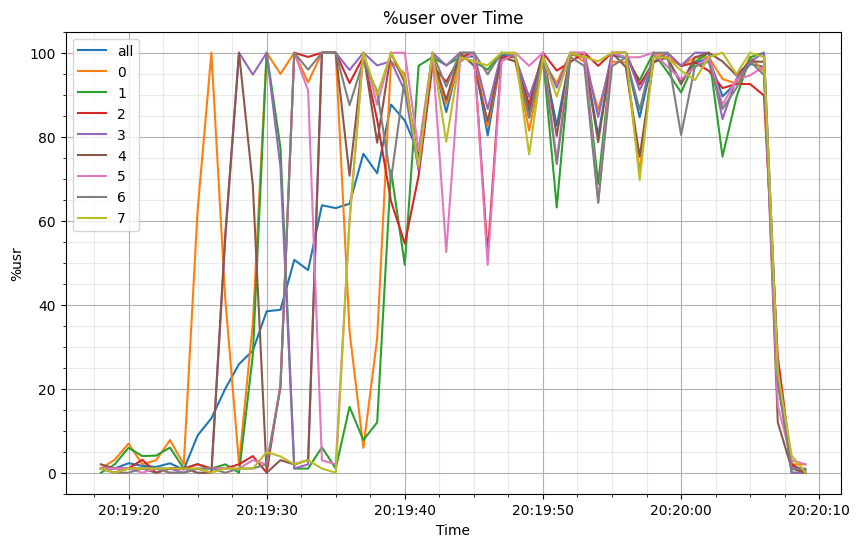

In [53]:
categories = df['CPU'].unique()
plt.figure(figsize=(10,6))
for category in categories:
    category_data = df[df['CPU'] == category]
    plt.plot(category_data['Time'], category_data['%usr'], label=category)
plt.legend()
plt.xlabel('Time')
plt.ylabel('%usr')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', color='#999999', alpha=0.2)
plt.title('%user over Time')
plt.savefig('./image/l1cache-usr-cpu.png')
plt.show()

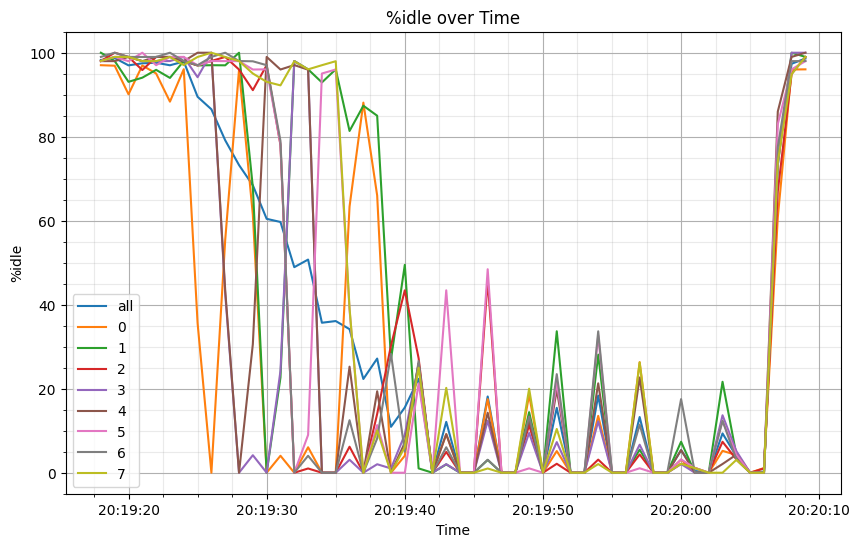

In [54]:
categories = df['CPU'].unique()
plt.figure(figsize=(10,6))
for category in categories:
    category_data = df[df['CPU'] == category]
    plt.plot(category_data['Time'], category_data['%idle'], label=category)
plt.legend()
plt.xlabel('Time')
plt.ylabel('%idle')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', color='#999999', alpha=0.2)
plt.title('%idle over Time')
plt.savefig('./image/l1cache-idle-cpu.png')
plt.show()

In [35]:
df = pd.read_csv('./l1cache-each-stat.csv', sep=';')
df.head()

Time  CPU   %usr  %nice  %sys  %iowait  %irq  %soft  %steal  %guest  \
0  21:11:21  all  13.39    0.0  0.63      0.0   0.0    0.0     0.0     0.0   
1  21:11:21    0  99.00    0.0  0.00      0.0   0.0    0.0     0.0     0.0   
2  21:11:21    1   1.00    0.0  0.00      0.0   0.0    0.0     0.0     0.0   
3  21:11:21    2   0.00    0.0  1.02      0.0   0.0    0.0     0.0     0.0   
4  21:11:21    3   1.00    0.0  1.00      0.0   0.0    0.0     0.0     0.0   

   %gnice  %idle  l1cache  
0     0.0  85.98        1  
1     0.0   1.00        1  
2     0.0  99.00        1  
3     0.0  98.98        1  
4     0.0  98.00        1

In [36]:
df['Time'] = pd.to_datetime(df['Time'])
df['Time'].head()

0   2023-11-05 21:11:21
1   2023-11-05 21:11:21
2   2023-11-05 21:11:21
3   2023-11-05 21:11:21
4   2023-11-05 21:11:21
Name: Time, dtype: datetime64[ns]

In [37]:
l1cache = df['l1cache'].unique()
l1cache

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

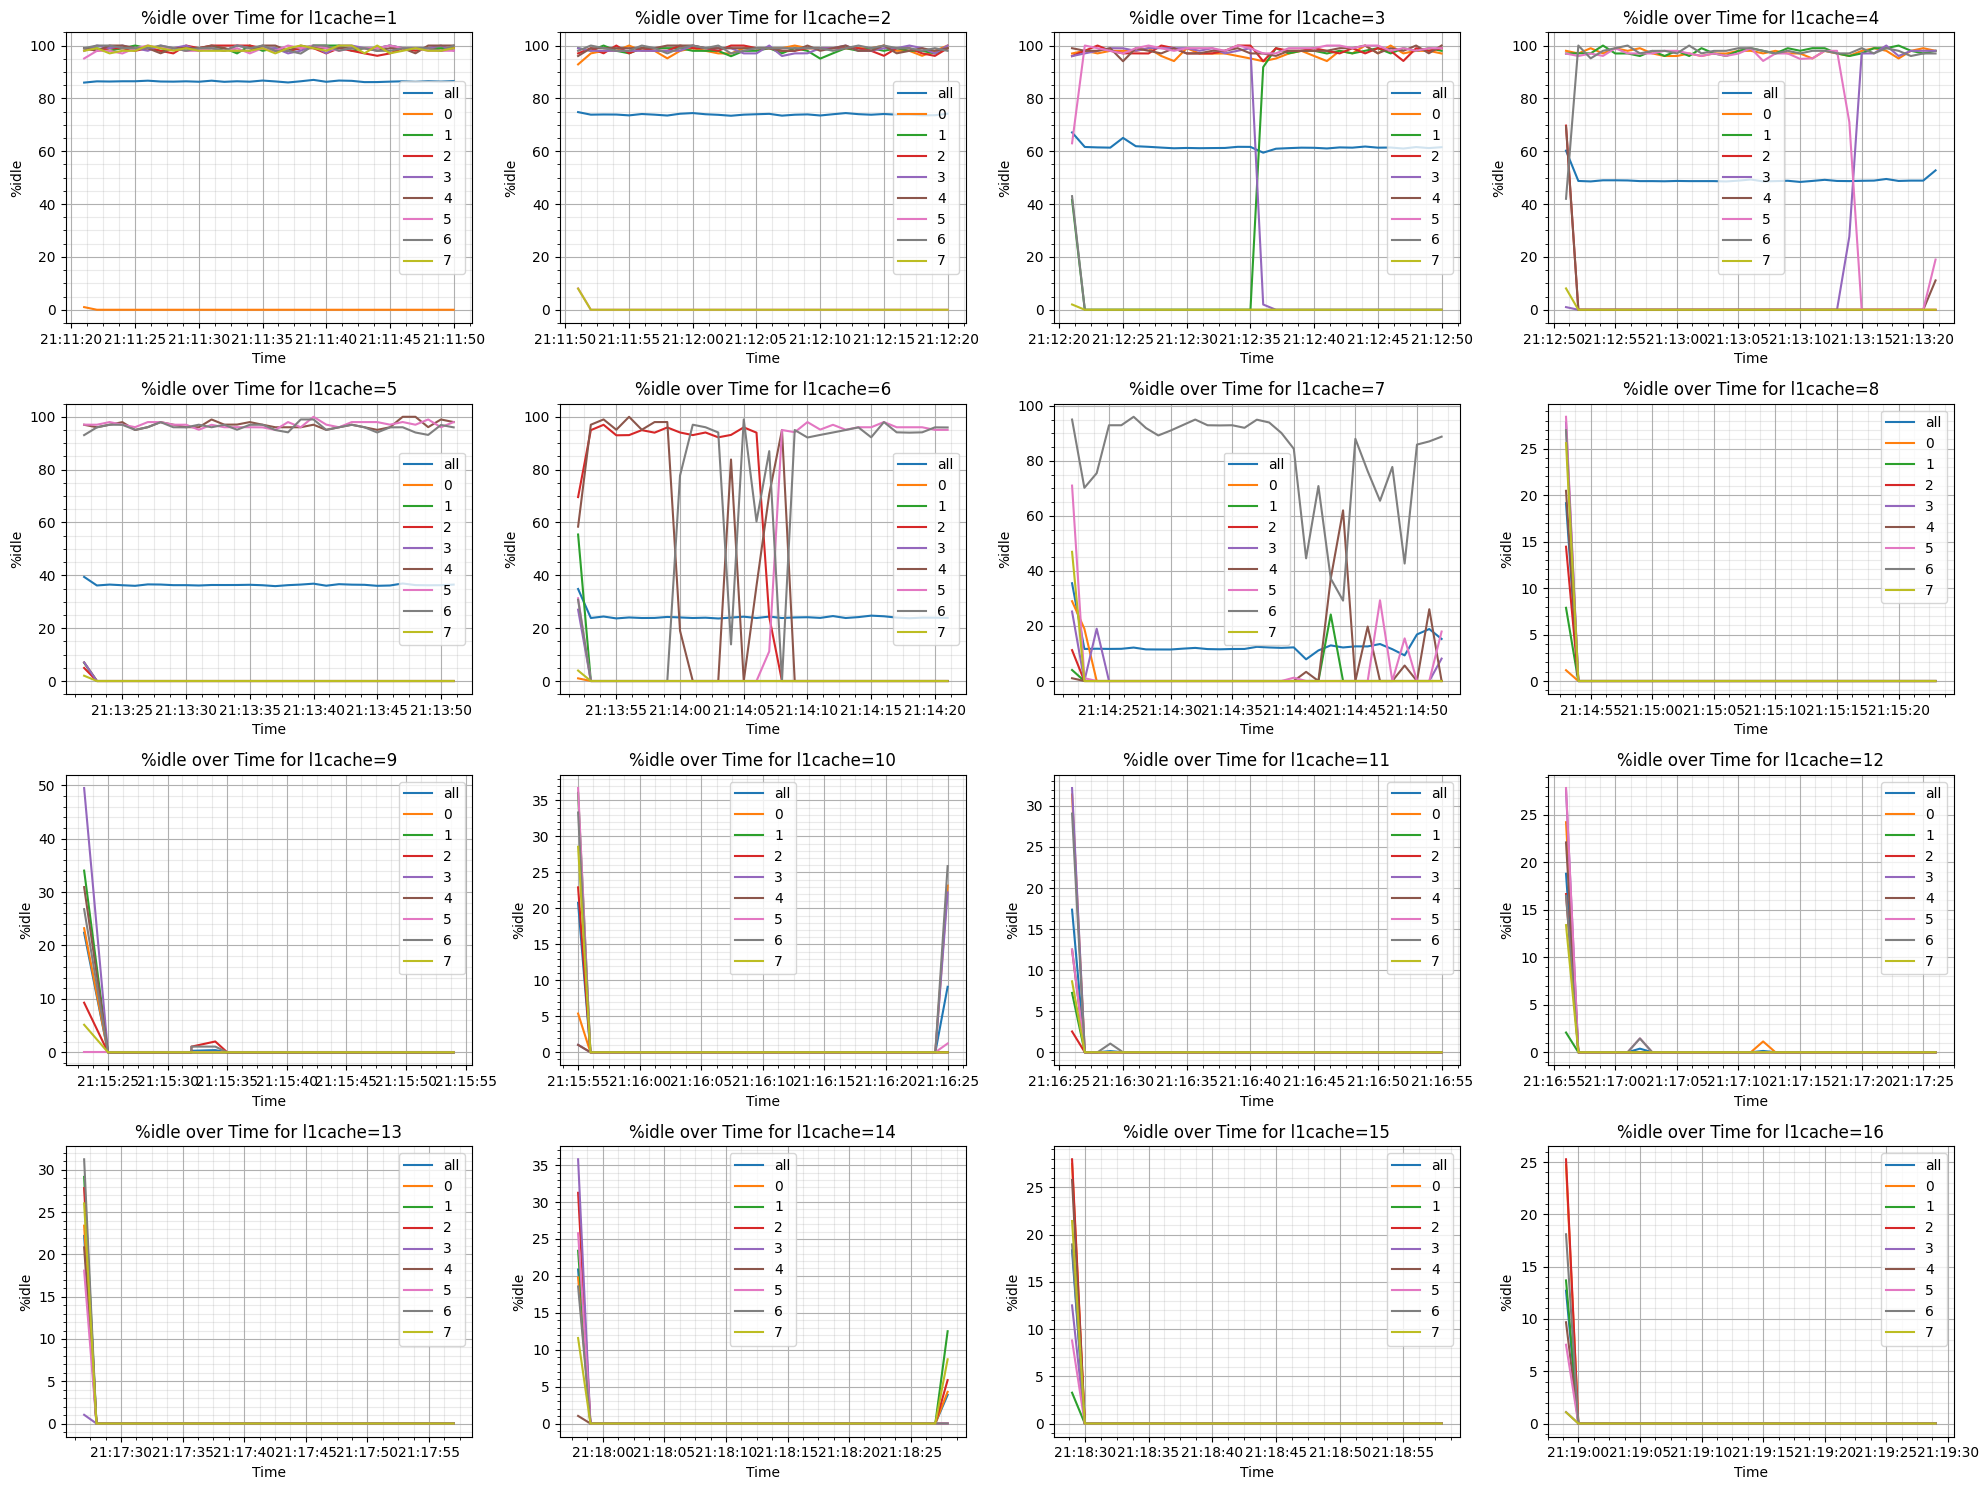

In [48]:
l1cache_values = df['l1cache'].unique()
categories = df['CPU'].unique()

fig, axs = plt.subplots(4, 4, figsize=(20,15))  # Create a 4x4 grid of subplots

for i in range(4):
    for j in range(4):
        index = i*4 + j  # Calculate the index for l1cache_values
        if index < len(l1cache_values):  # Check if there is a l1cache value for this index
            value = l1cache_values[index]
            data = df[df['l1cache'] == value]
            for category in categories:
                category_data = data[data['CPU'] == category]
                axs[i, j].plot(category_data['Time'], category_data['%idle'], label=category)
            axs[i, j].legend()
            axs[i, j].set_xlabel('Time')
            axs[i, j].set_ylabel('%idle')
            axs[i, j].grid(True)
            axs[i, j].minorticks_on()
            axs[i, j].grid(which='minor', linestyle='-', color='#999999', alpha=0.2)
            axs[i, j].set_title(f'%idle over Time for l1cache={value}')

plt.tight_layout()  # To ensure subplots do not overlap
plt.savefig('./image/l1cache-each-idle-cpu.png')
plt.show()

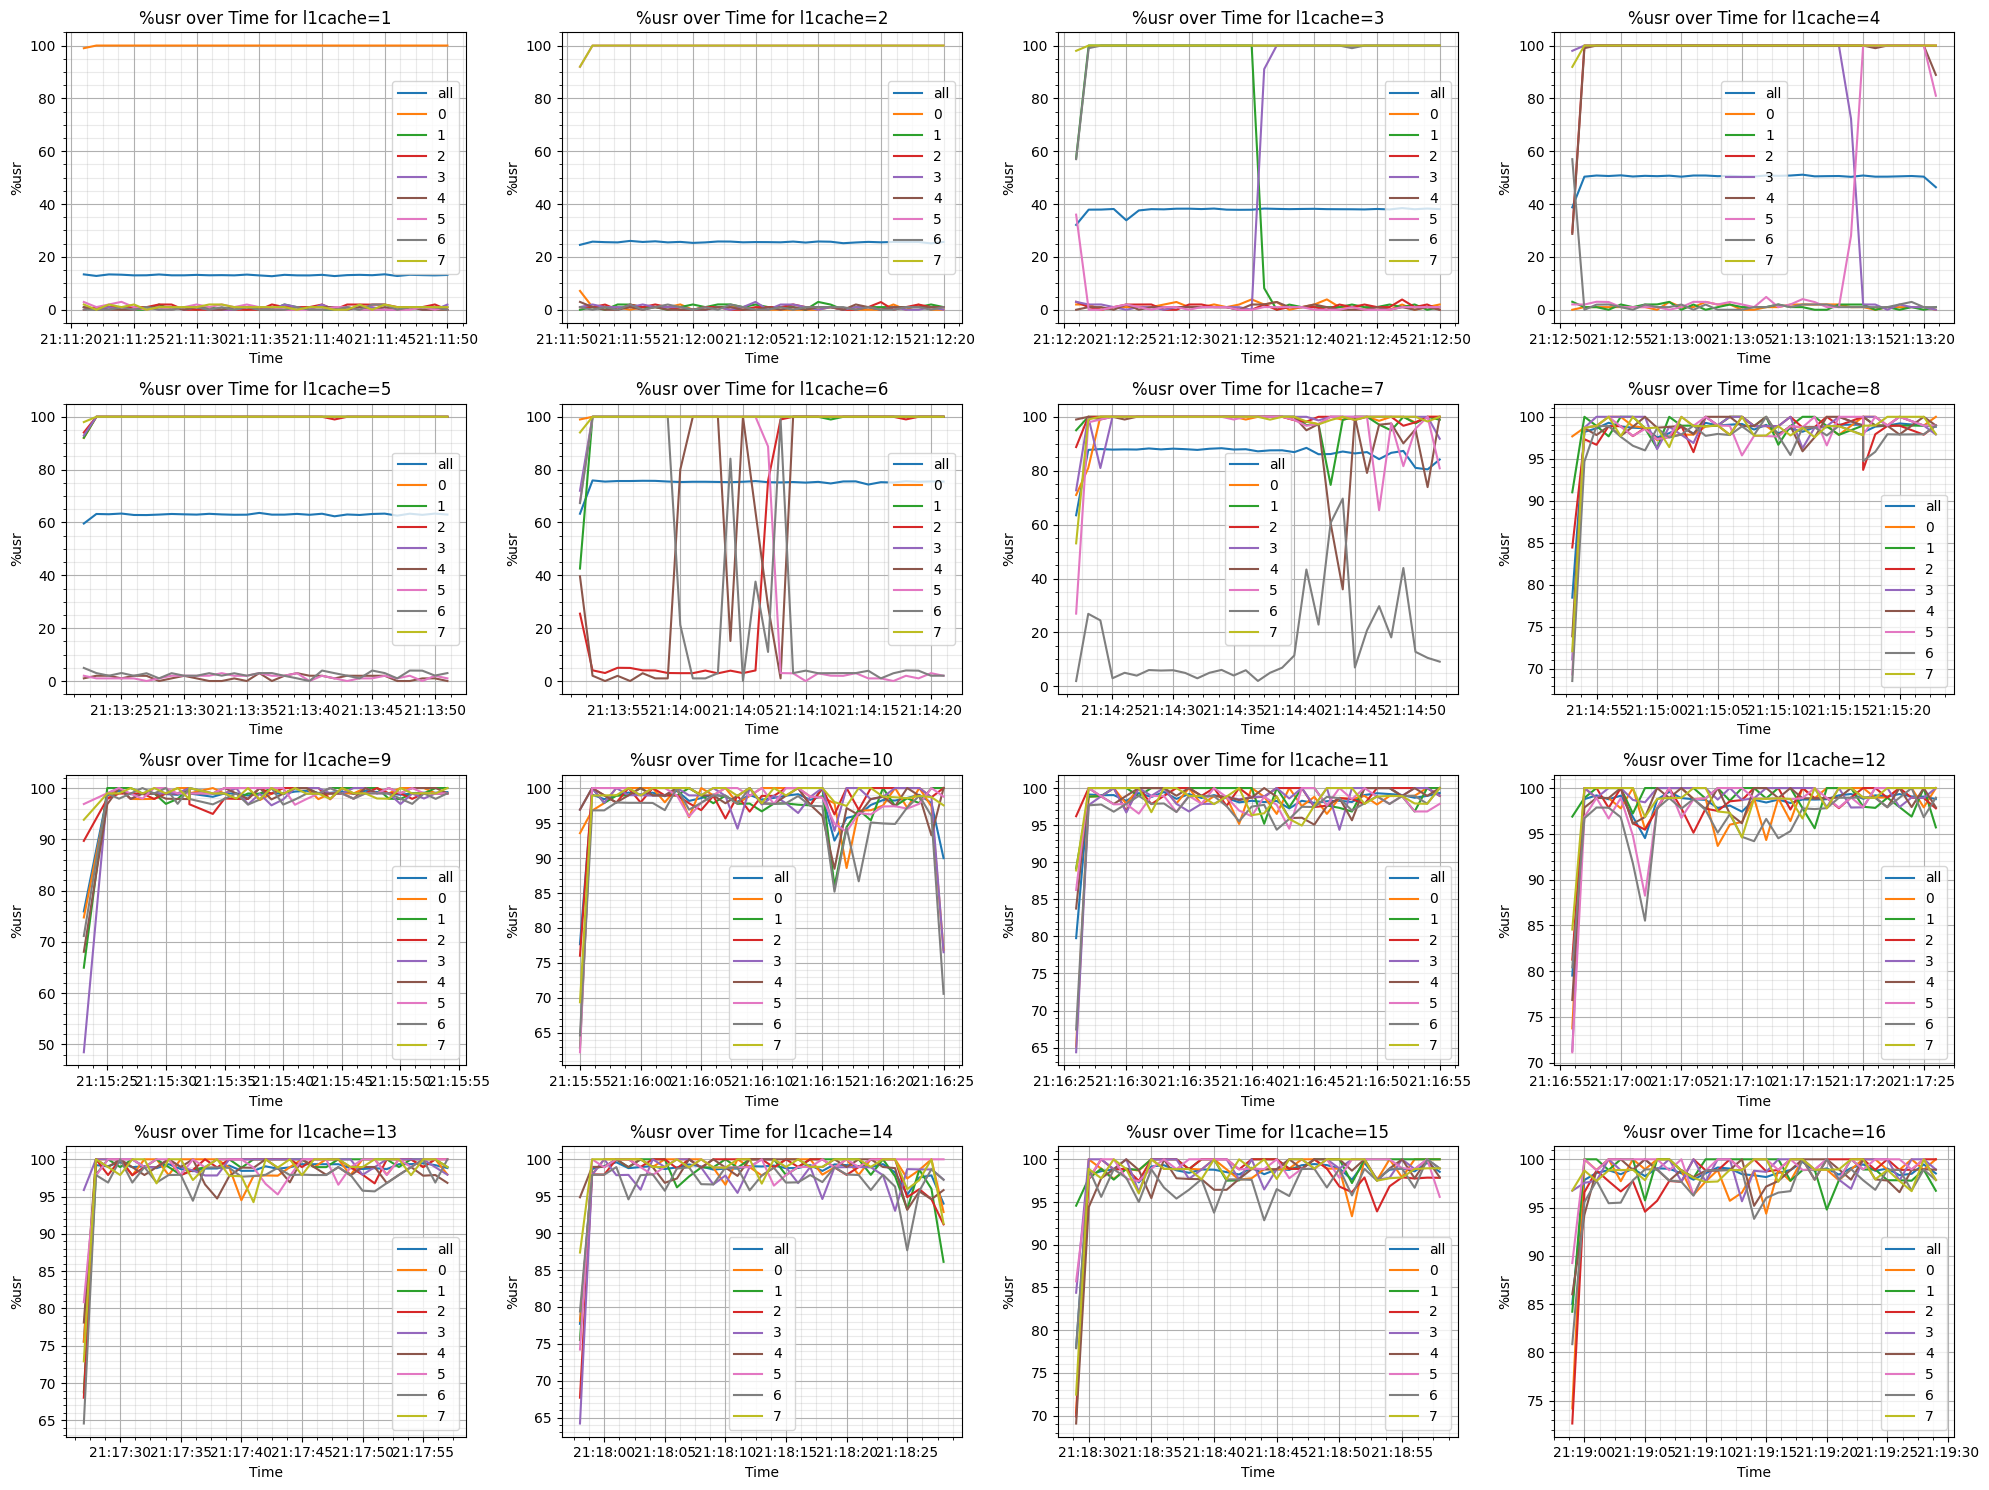

In [47]:
l1cache_values = df['l1cache'].unique()
categories = df['CPU'].unique()

fig, axs = plt.subplots(4, 4, figsize=(20,15))  # Create a 4x4 grid of subplots

for i in range(4):
    for j in range(4):
        index = i*4 + j  # Calculate the index for l1cache_values
        if index < len(l1cache_values):  # Check if there is a l1cache value for this index
            value = l1cache_values[index]
            data = df[df['l1cache'] == value]
            for category in categories:
                category_data = data[data['CPU'] == category]
                axs[i, j].plot(category_data['Time'], category_data['%usr'], label=category)
            axs[i, j].legend()
            axs[i, j].set_xlabel('Time')
            axs[i, j].set_ylabel('%usr')
            axs[i, j].grid(True)
            axs[i, j].minorticks_on()
            axs[i, j].grid(which='minor', linestyle='-', color='#999999', alpha=0.2)
            axs[i, j].set_title(f'%usr over Time for l1cache={value}')

plt.tight_layout()  # To ensure subplots do not overlap
plt.savefig('./image/l1cache-each-usr-cpu.png')
plt.show()

In [65]:
df = pd.read_csv('./csv/l1cache-sets.csv', sep=';')
df.head()

Time  CPU   %usr  %nice  %sys  %iowait  %irq  %soft  %steal  %guest  \
0  22:42:20  all  96.87    0.0  1.70      0.0   0.0    0.0     0.0     0.0   
1  22:42:20    0  98.94    0.0  0.00      0.0   0.0    0.0     0.0     0.0   
2  22:42:20    1  97.94    0.0  0.00      0.0   0.0    0.0     0.0     0.0   
3  22:42:20    2  94.85    0.0  5.15      0.0   0.0    0.0     0.0     0.0   
4  22:42:20    3  95.79    0.0  3.16      0.0   0.0    0.0     0.0     0.0   

   %gnice  %idle  l1cache-sets  
0     0.0   1.44             1  
1     0.0   1.06             1  
2     0.0   2.06             1  
3     0.0   0.00             1  
4     0.0   1.05             1

In [66]:
df['Time'] = pd.to_datetime(df['Time'])
df.head()

Time  CPU   %usr  %nice  %sys  %iowait  %irq  %soft  %steal  \
0 2023-11-05 22:42:20  all  96.87    0.0  1.70      0.0   0.0    0.0     0.0   
1 2023-11-05 22:42:20    0  98.94    0.0  0.00      0.0   0.0    0.0     0.0   
2 2023-11-05 22:42:20    1  97.94    0.0  0.00      0.0   0.0    0.0     0.0   
3 2023-11-05 22:42:20    2  94.85    0.0  5.15      0.0   0.0    0.0     0.0   
4 2023-11-05 22:42:20    3  95.79    0.0  3.16      0.0   0.0    0.0     0.0   

   %guest  %gnice  %idle  l1cache-sets  
0     0.0     0.0   1.44             1  
1     0.0     0.0   1.06             1  
2     0.0     0.0   2.06             1  
3     0.0     0.0   0.00             1  
4     0.0     0.0   1.05             1

In [73]:
df.describe()

%usr        %nice         %sys  %iowait    %irq        %soft  \
count  4392.000000  4392.000000  4392.000000   4392.0  4392.0  4392.000000   
mean     98.134331     0.005965     1.189212      0.0     0.0     0.047470   
std       4.313433     0.203660     1.255616      0.0     0.0     0.223485   
min      43.620000     0.000000     0.000000      0.0     0.0     0.000000   
25%      97.920000     0.000000     0.000000      0.0     0.0     0.000000   
50%      98.940000     0.000000     1.050000      0.0     0.0     0.000000   
75%     100.000000     0.000000     2.040000      0.0     0.0     0.000000   
max     100.000000    11.460000    22.830000      0.0     0.0     5.320000   

       %steal  %guest  %gnice        %idle  l1cache-sets  
count  4392.0  4392.0  4392.0  4392.000000   4392.000000  
mean      0.0     0.0     0.0     0.622930      8.508197  
std       0.0     0.0     0.0     4.042002      4.610290  
min       0.0     0.0     0.0     0.000000      1.000000  
25%       0.0     0.0     0.0     0.000000      4.750000  
50%       0.0     0.0     0.0     0.000000      8.500000  
75%       0.0     0.0     0.0     0.000000     12.250000  
max       0.0     0.0     0.0    55.320000     16.000000

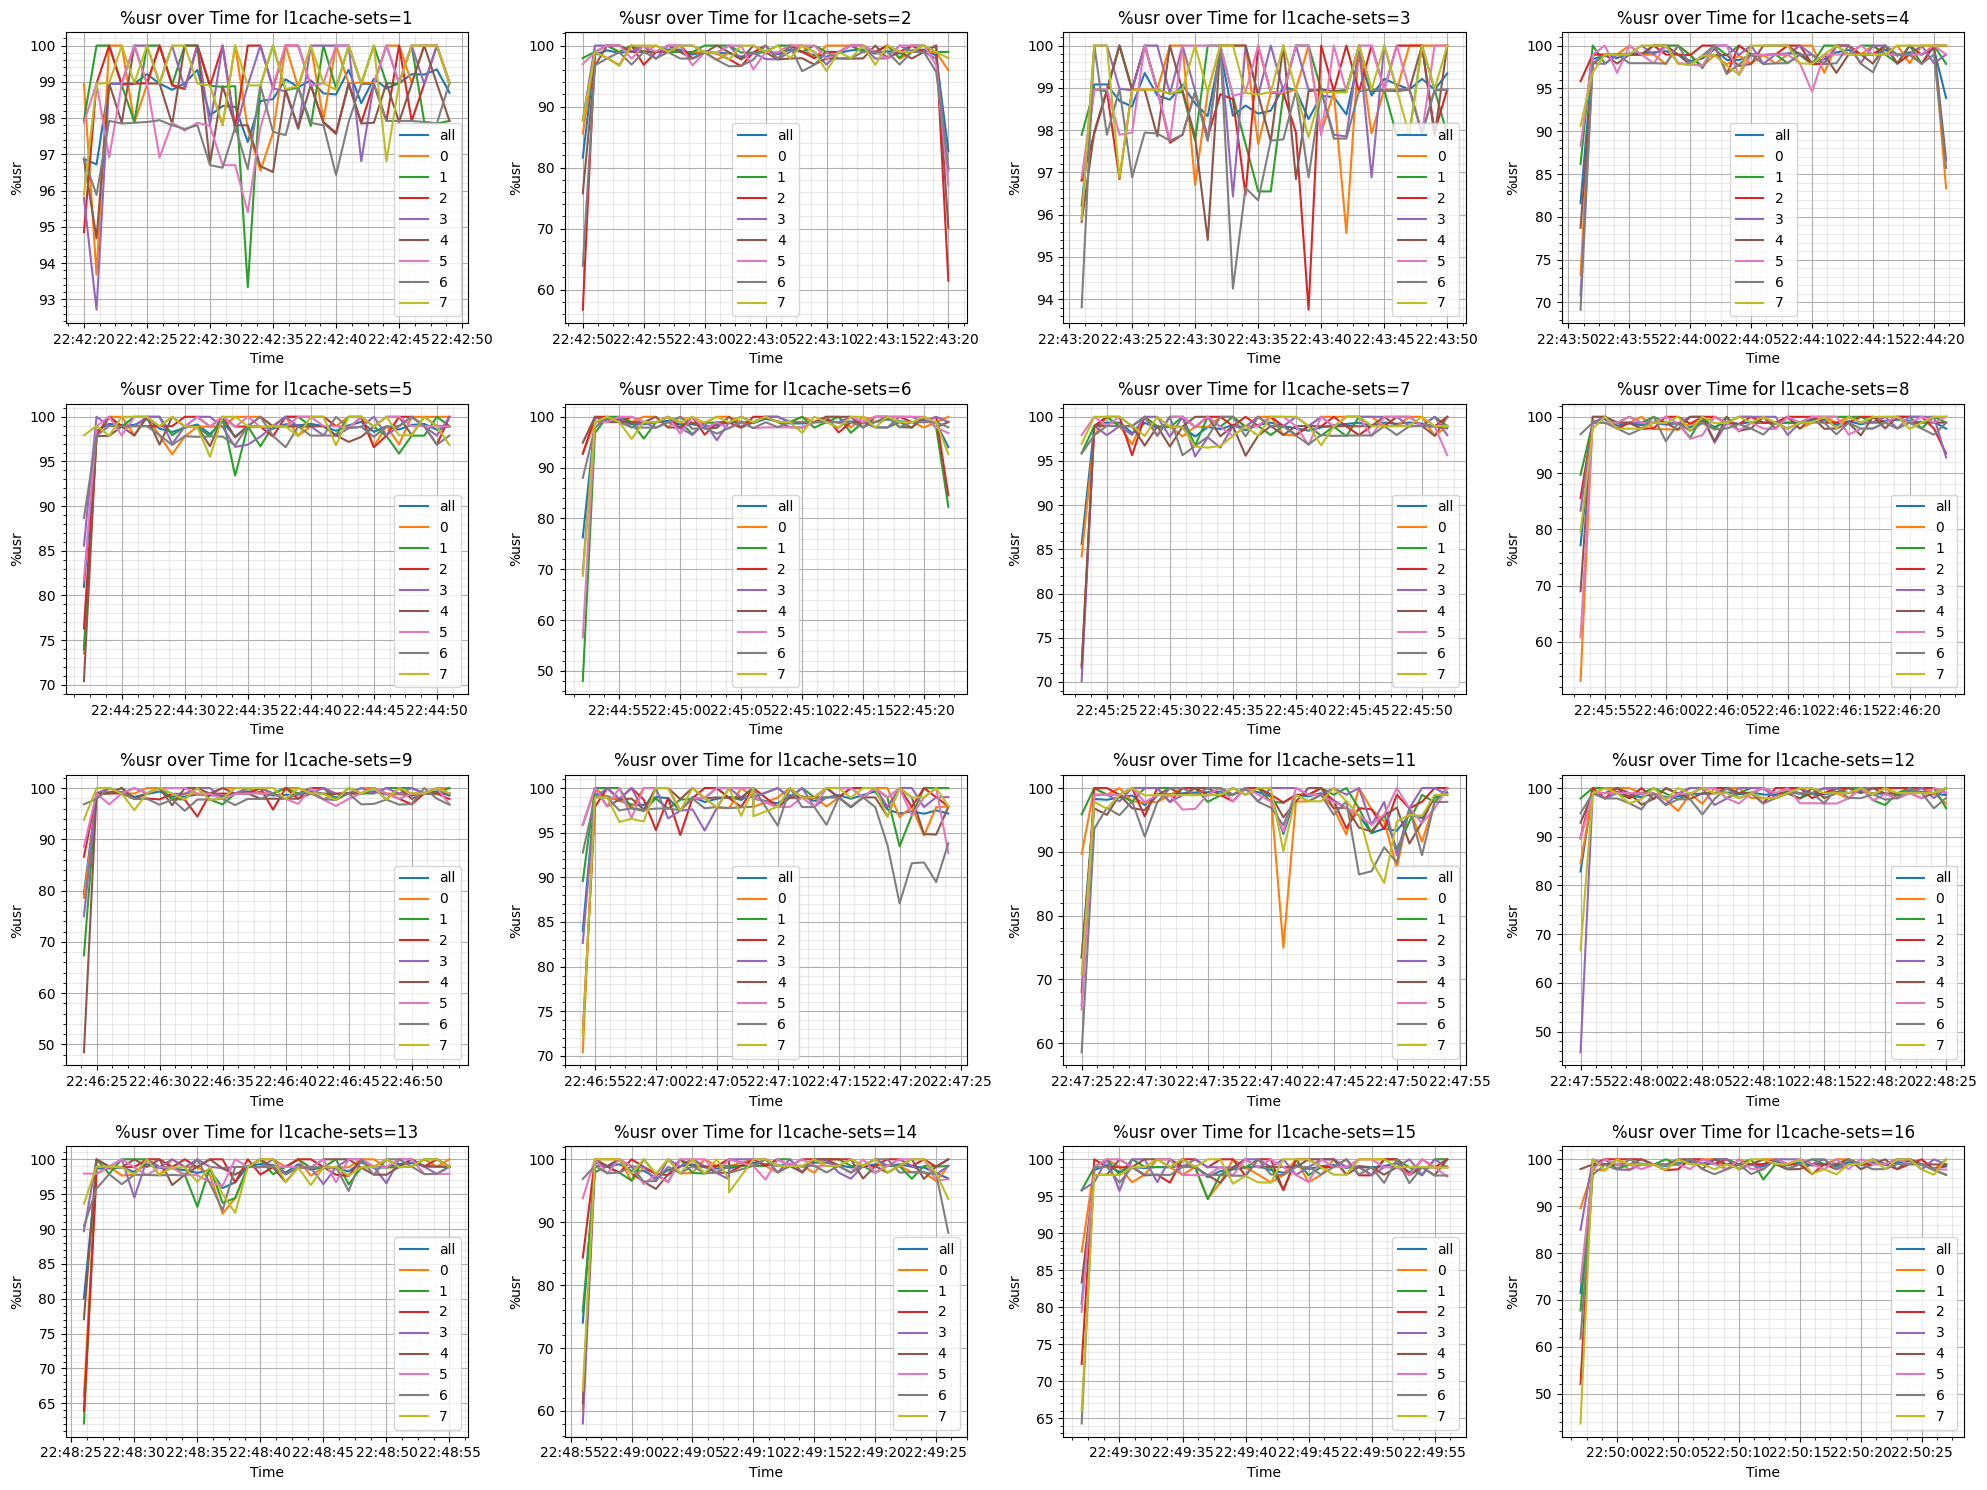

In [69]:
l1cache_values = df['l1cache-sets'].unique()
categories = df['CPU'].unique()

fig, axs = plt.subplots(4, 4, figsize=(20,15))  # Create a 4x4 grid of subplots

for i in range(4):
    for j in range(4):
        index = i*4 + j  # Calculate the index for l1cache_values
        if index < len(l1cache_values):  # Check if there is a l1cache value for this index
            value = l1cache_values[index]
            data = df[df['l1cache-sets'] == value]
            for category in categories:
                category_data = data[data['CPU'] == category]
                axs[i, j].plot(category_data['Time'], category_data['%usr'], label=category)
            axs[i, j].legend()
            axs[i, j].set_xlabel('Time')
            axs[i, j].set_ylabel('%usr')
            axs[i, j].grid(True)
            axs[i, j].minorticks_on()
            axs[i, j].grid(which='minor', linestyle='-', color='#999999', alpha=0.2)
            axs[i, j].set_title(f'%usr over Time for l1cache-sets={value}')

plt.tight_layout()  # To ensure subplots do not overlap
plt.savefig('./image/l1cache-sets-usr-cpu.png')
plt.show()

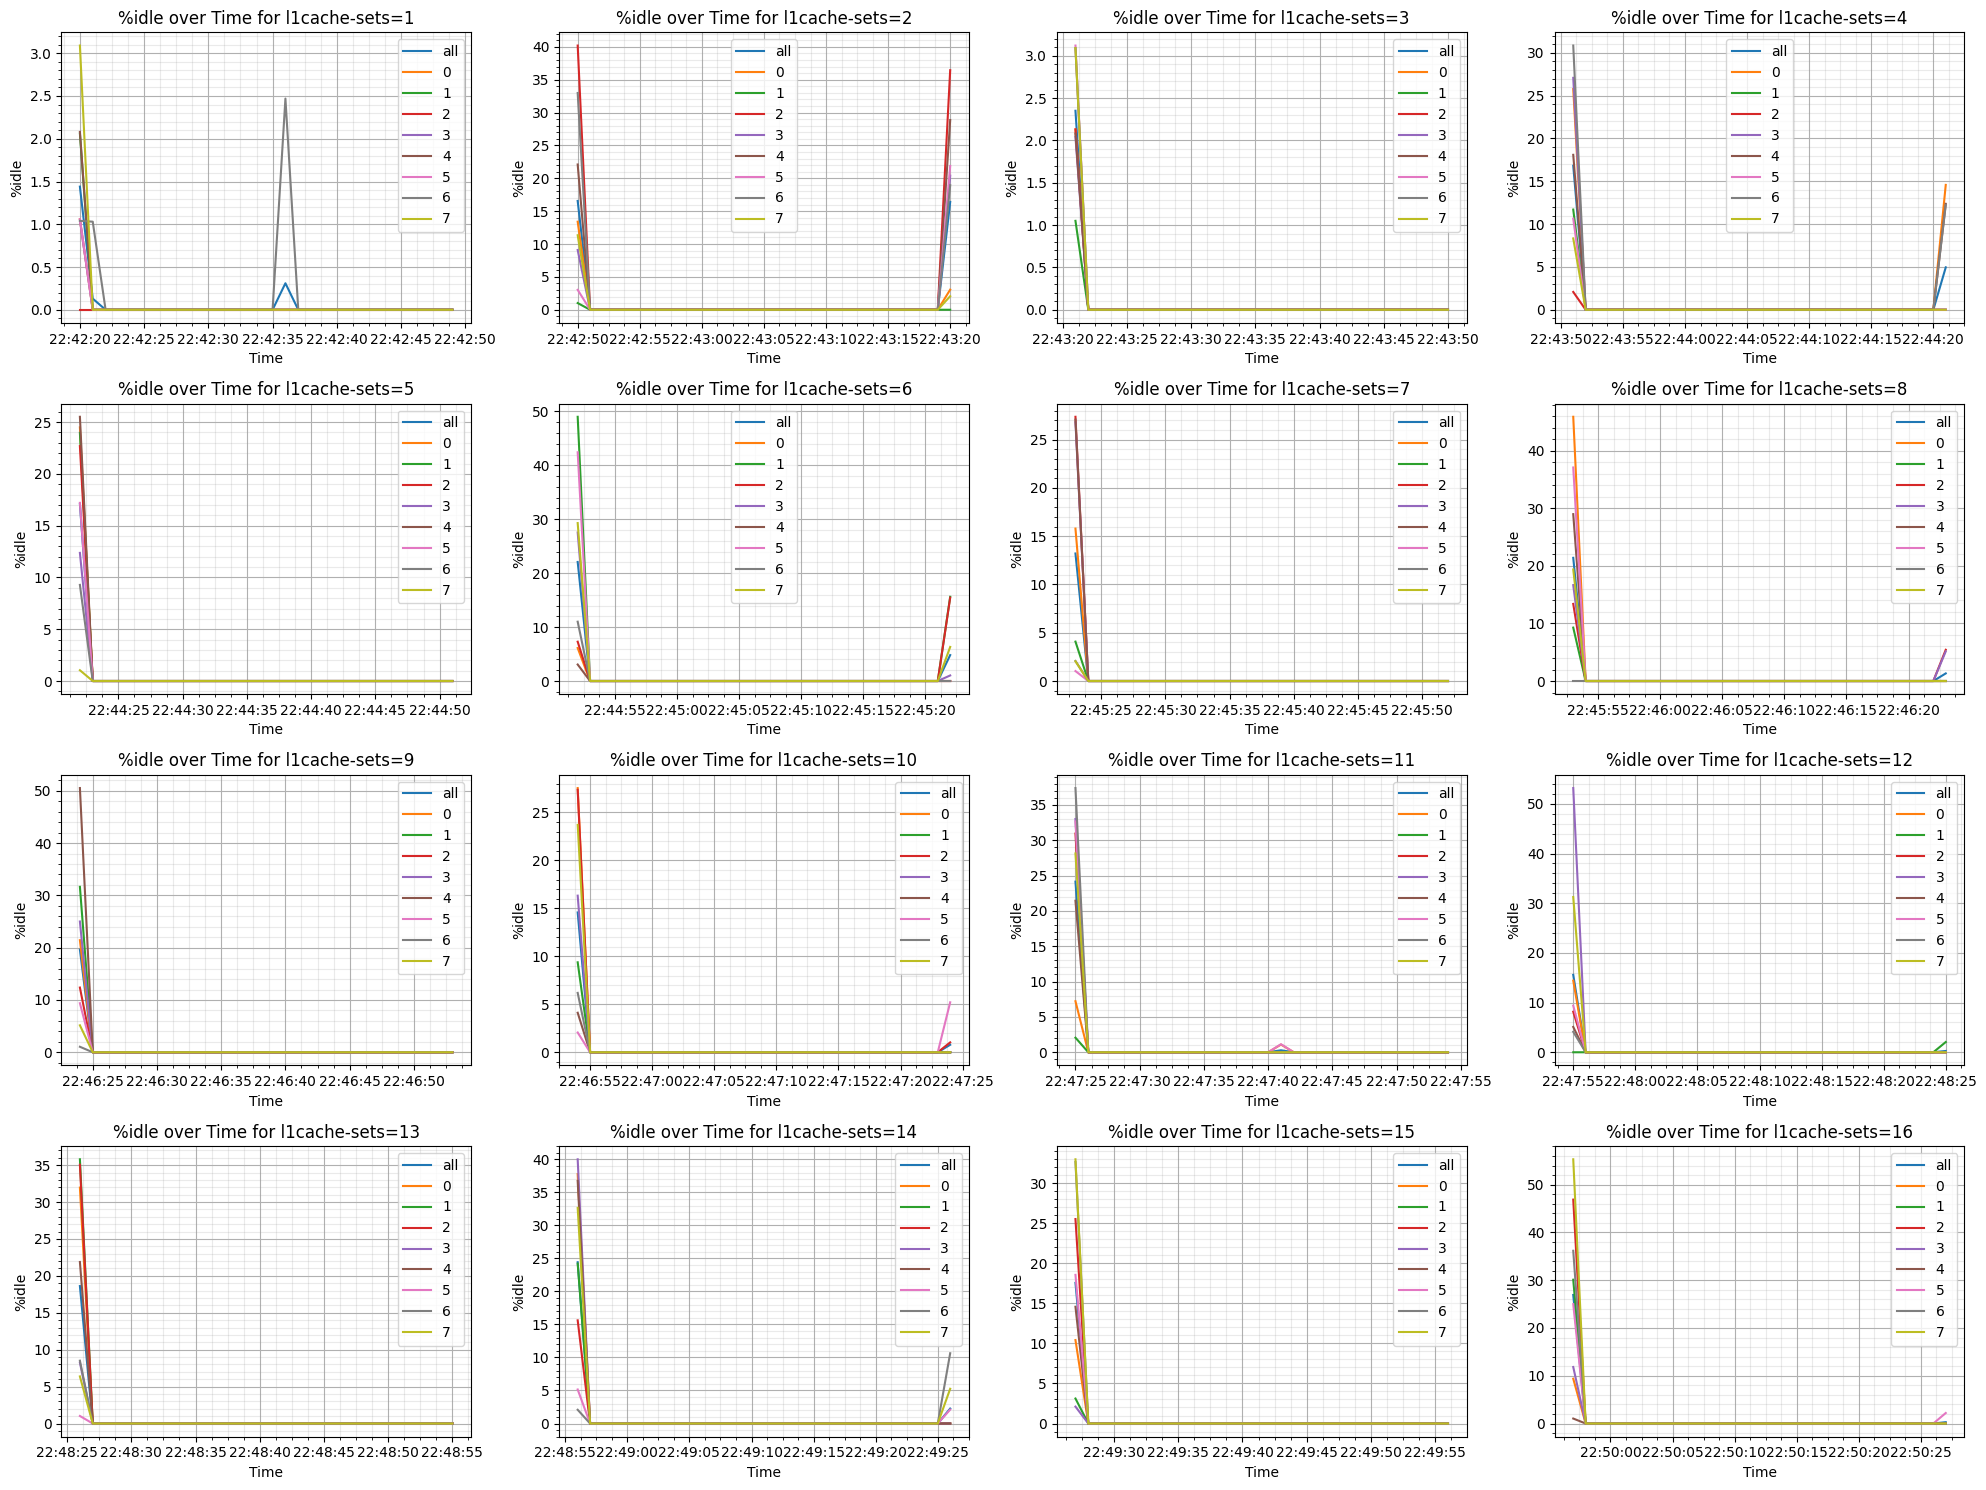

In [70]:
l1cache_values = df['l1cache-sets'].unique()
categories = df['CPU'].unique()

fig, axs = plt.subplots(4, 4, figsize=(20,15))  # Create a 4x4 grid of subplots

for i in range(4):
    for j in range(4):
        index = i*4 + j  # Calculate the index for l1cache_values
        if index < len(l1cache_values):  # Check if there is a l1cache value for this index
            value = l1cache_values[index]
            data = df[df['l1cache-sets'] == value]
            for category in categories:
                category_data = data[data['CPU'] == category]
                axs[i, j].plot(category_data['Time'], category_data['%idle'], label=category)
            axs[i, j].legend()
            axs[i, j].set_xlabel('Time')
            axs[i, j].set_ylabel('%idle')
            axs[i, j].grid(True)
            axs[i, j].minorticks_on()
            axs[i, j].grid(which='minor', linestyle='-', color='#999999', alpha=0.2)
            axs[i, j].set_title(f'%idle over Time for l1cache-sets={value}')

plt.tight_layout()  # To ensure subplots do not overlap
plt.savefig('./image/l1cache-sets-idle-cpu.png')
plt.show()

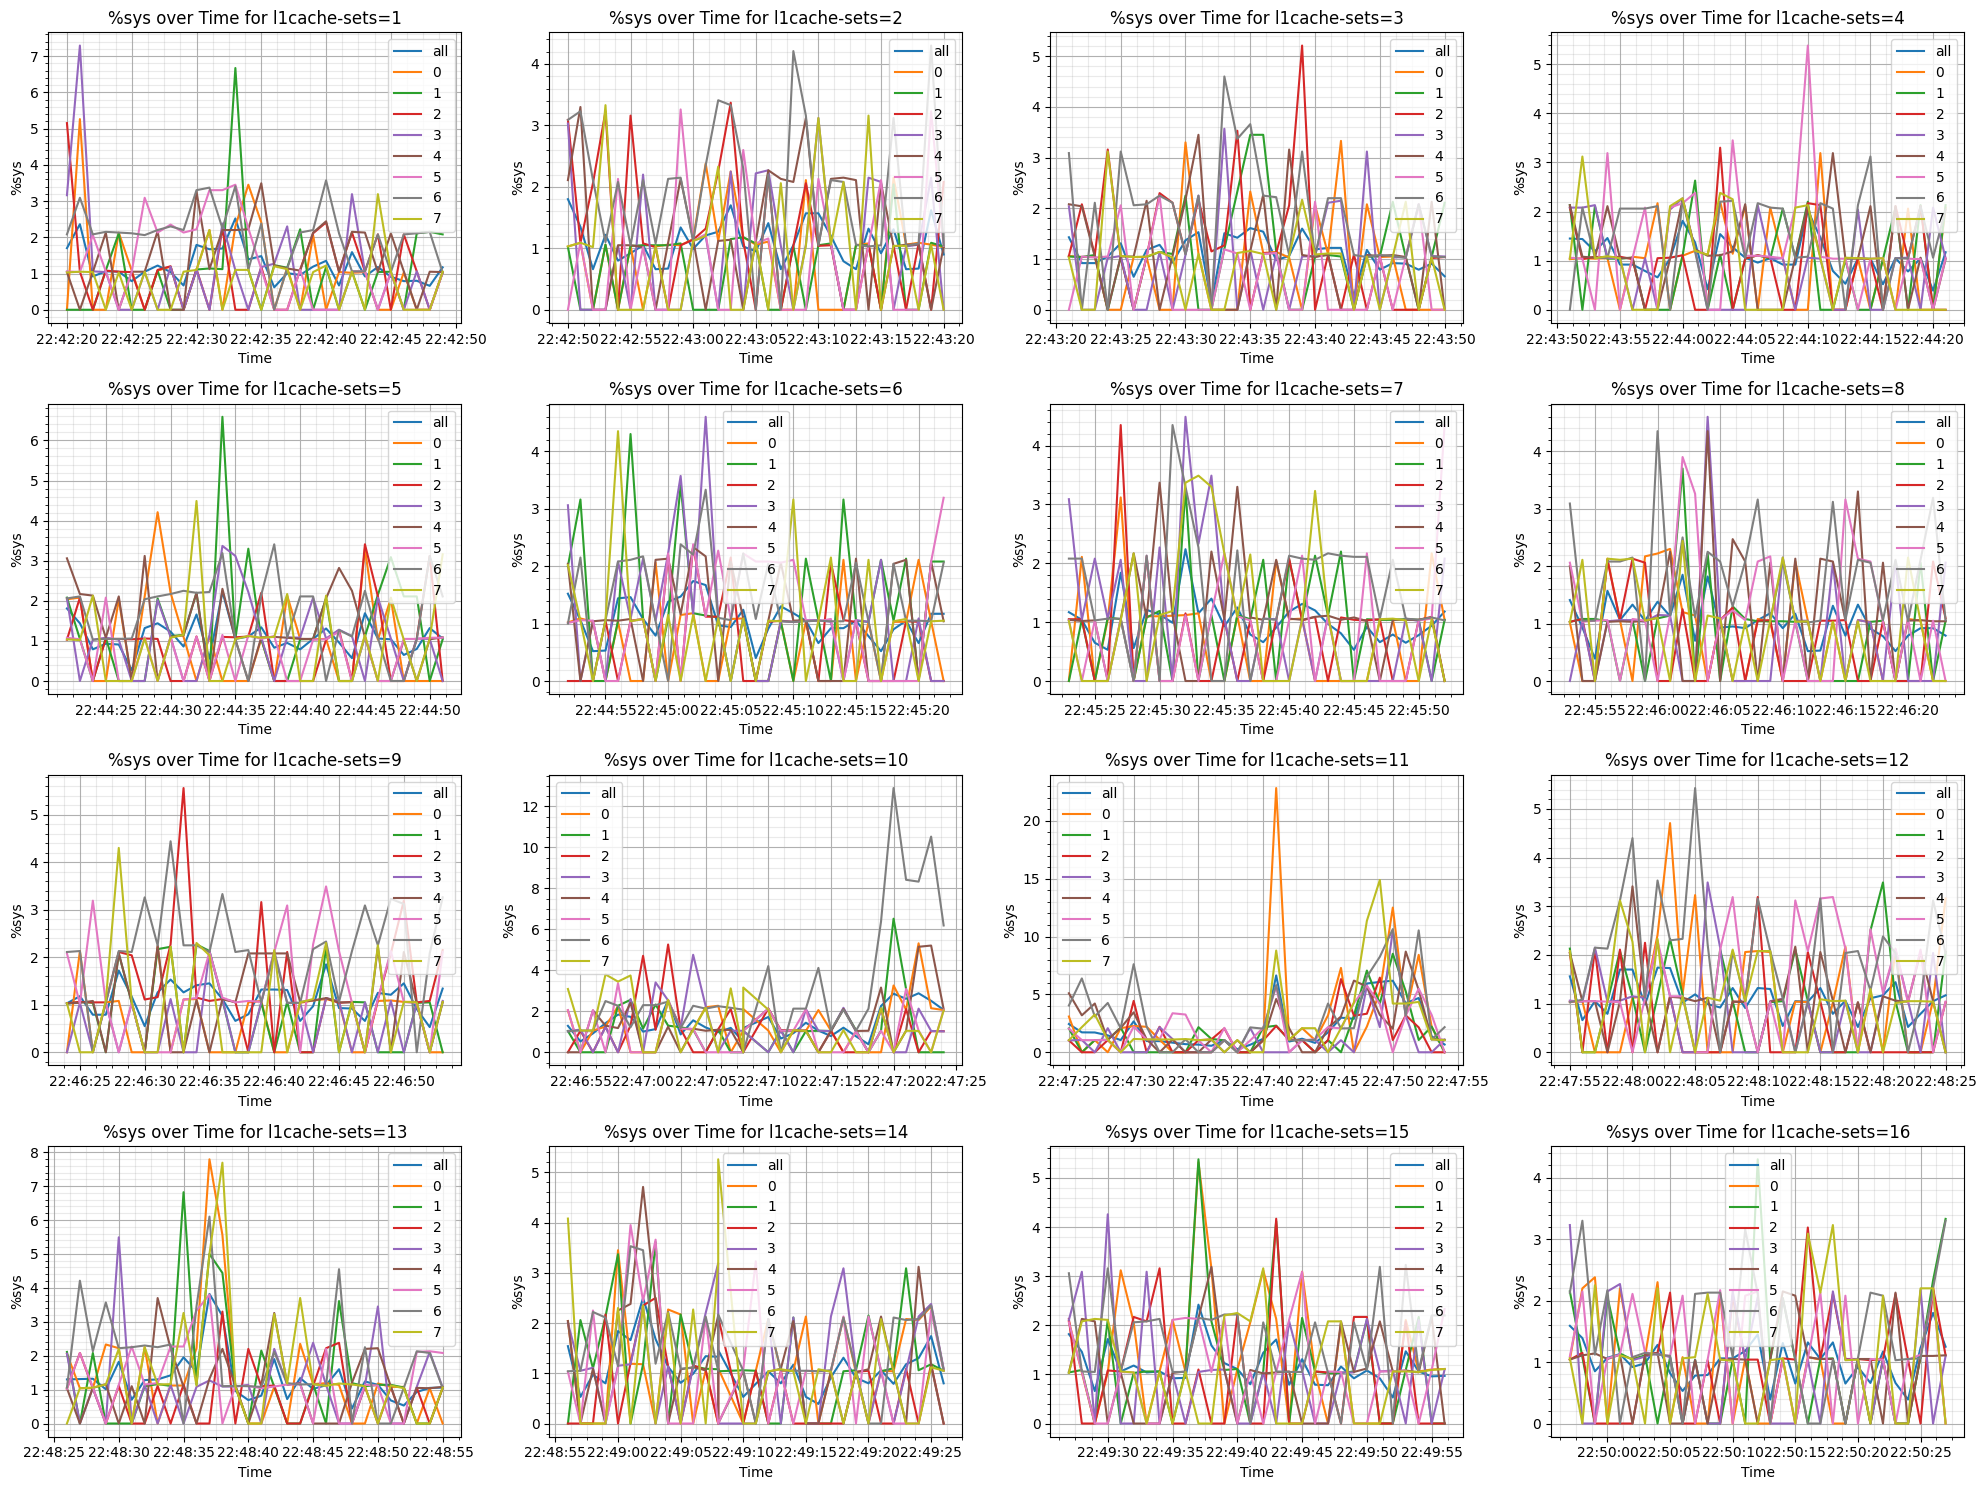

In [72]:
l1cache_values = df['l1cache-sets'].unique()
categories = df['CPU'].unique()

fig, axs = plt.subplots(4, 4, figsize=(20,15))  # Create a 4x4 grid of subplots

for i in range(4):
    for j in range(4):
        index = i*4 + j  # Calculate the index for l1cache_values
        if index < len(l1cache_values):  # Check if there is a l1cache value for this index
            value = l1cache_values[index]
            data = df[df['l1cache-sets'] == value]
            for category in categories:
                category_data = data[data['CPU'] == category]
                axs[i, j].plot(category_data['Time'], category_data['%sys'], label=category)
            axs[i, j].legend()
            axs[i, j].set_xlabel('Time')
            axs[i, j].set_ylabel('%sys')
            axs[i, j].grid(True)
            axs[i, j].minorticks_on()
            axs[i, j].grid(which='minor', linestyle='-', color='#999999', alpha=0.2)
            axs[i, j].set_title(f'%sys over Time for l1cache-sets={value}')

plt.tight_layout()  # To ensure subplots do not overlap
plt.savefig('./image/l1cache-sets-sys-cpu.png')
plt.show()

In [80]:
df = pd.read_csv('./csv/l1cache-sets-testing-2.csv', sep=';')
df.head()

Time  CPU   %usr  %nice  %sys  %iowait  %irq  %soft  %steal  %guest  \
0  00:26:32  all  96.31    0.0  2.05      0.0   0.0   0.14     0.0     0.0   
1  00:26:32    0  97.87    0.0  2.13      0.0   0.0   0.00     0.0     0.0   
2  00:26:32    1  96.63    0.0  1.12      0.0   0.0   0.00     0.0     0.0   
3  00:26:32    2  94.44    0.0  4.44      0.0   0.0   0.00     0.0     0.0   
4  00:26:32    3  97.83    0.0  0.00      0.0   0.0   0.00     0.0     0.0   

   %gnice  %idle  l1cache-sets  
0     0.0   1.50           100  
1     0.0   0.00           100  
2     0.0   2.25           100  
3     0.0   1.11           100  
4     0.0   2.17           100

In [81]:
df['Time'] = pd.to_datetime(df['Time'])
df.head()

Time  CPU   %usr  %nice  %sys  %iowait  %irq  %soft  %steal  \
0 2023-11-06 00:26:32  all  96.31    0.0  2.05      0.0   0.0   0.14     0.0   
1 2023-11-06 00:26:32    0  97.87    0.0  2.13      0.0   0.0   0.00     0.0   
2 2023-11-06 00:26:32    1  96.63    0.0  1.12      0.0   0.0   0.00     0.0   
3 2023-11-06 00:26:32    2  94.44    0.0  4.44      0.0   0.0   0.00     0.0   
4 2023-11-06 00:26:32    3  97.83    0.0  0.00      0.0   0.0   0.00     0.0   

   %guest  %gnice  %idle  l1cache-sets  
0     0.0     0.0   1.50           100  
1     0.0     0.0   0.00           100  
2     0.0     0.0   2.25           100  
3     0.0     0.0   1.11           100  
4     0.0     0.0   2.17           100

In [82]:
df.describe()

%usr        %nice         %sys  %iowait    %irq        %soft  \
count  1692.000000  1692.000000  1692.000000   1692.0  1692.0  1692.000000   
mean     97.528304     0.000680     1.342813      0.0     0.0     0.066613   
std       5.304377     0.024996     1.352619      0.0     0.0     0.352044   
min      57.730000     0.000000     0.000000      0.0     0.0     0.000000   
25%      97.870000     0.000000     0.000000      0.0     0.0     0.000000   
50%      98.920000     0.000000     1.060000      0.0     0.0     0.000000   
75%     100.000000     0.000000     2.080000      0.0     0.0     0.000000   
max     100.000000     1.020000    11.580000      0.0     0.0     5.260000   

       %steal  %guest  %gnice        %idle  l1cache-sets  
count  1692.0  1692.0  1692.0  1692.000000   1692.000000  
mean      0.0     0.0     0.0     1.061548    504.787234  
std       0.0     0.0     0.0     4.791559    313.665896  
min       0.0     0.0     0.0     0.000000    100.000000  
25%       0.0     0.0     0.0     0.000000    200.000000  
50%       0.0     0.0     0.0     0.000000    500.000000  
75%       0.0     0.0     0.0     0.000000    800.000000  
max       0.0     0.0     0.0    39.180000   1000.000000

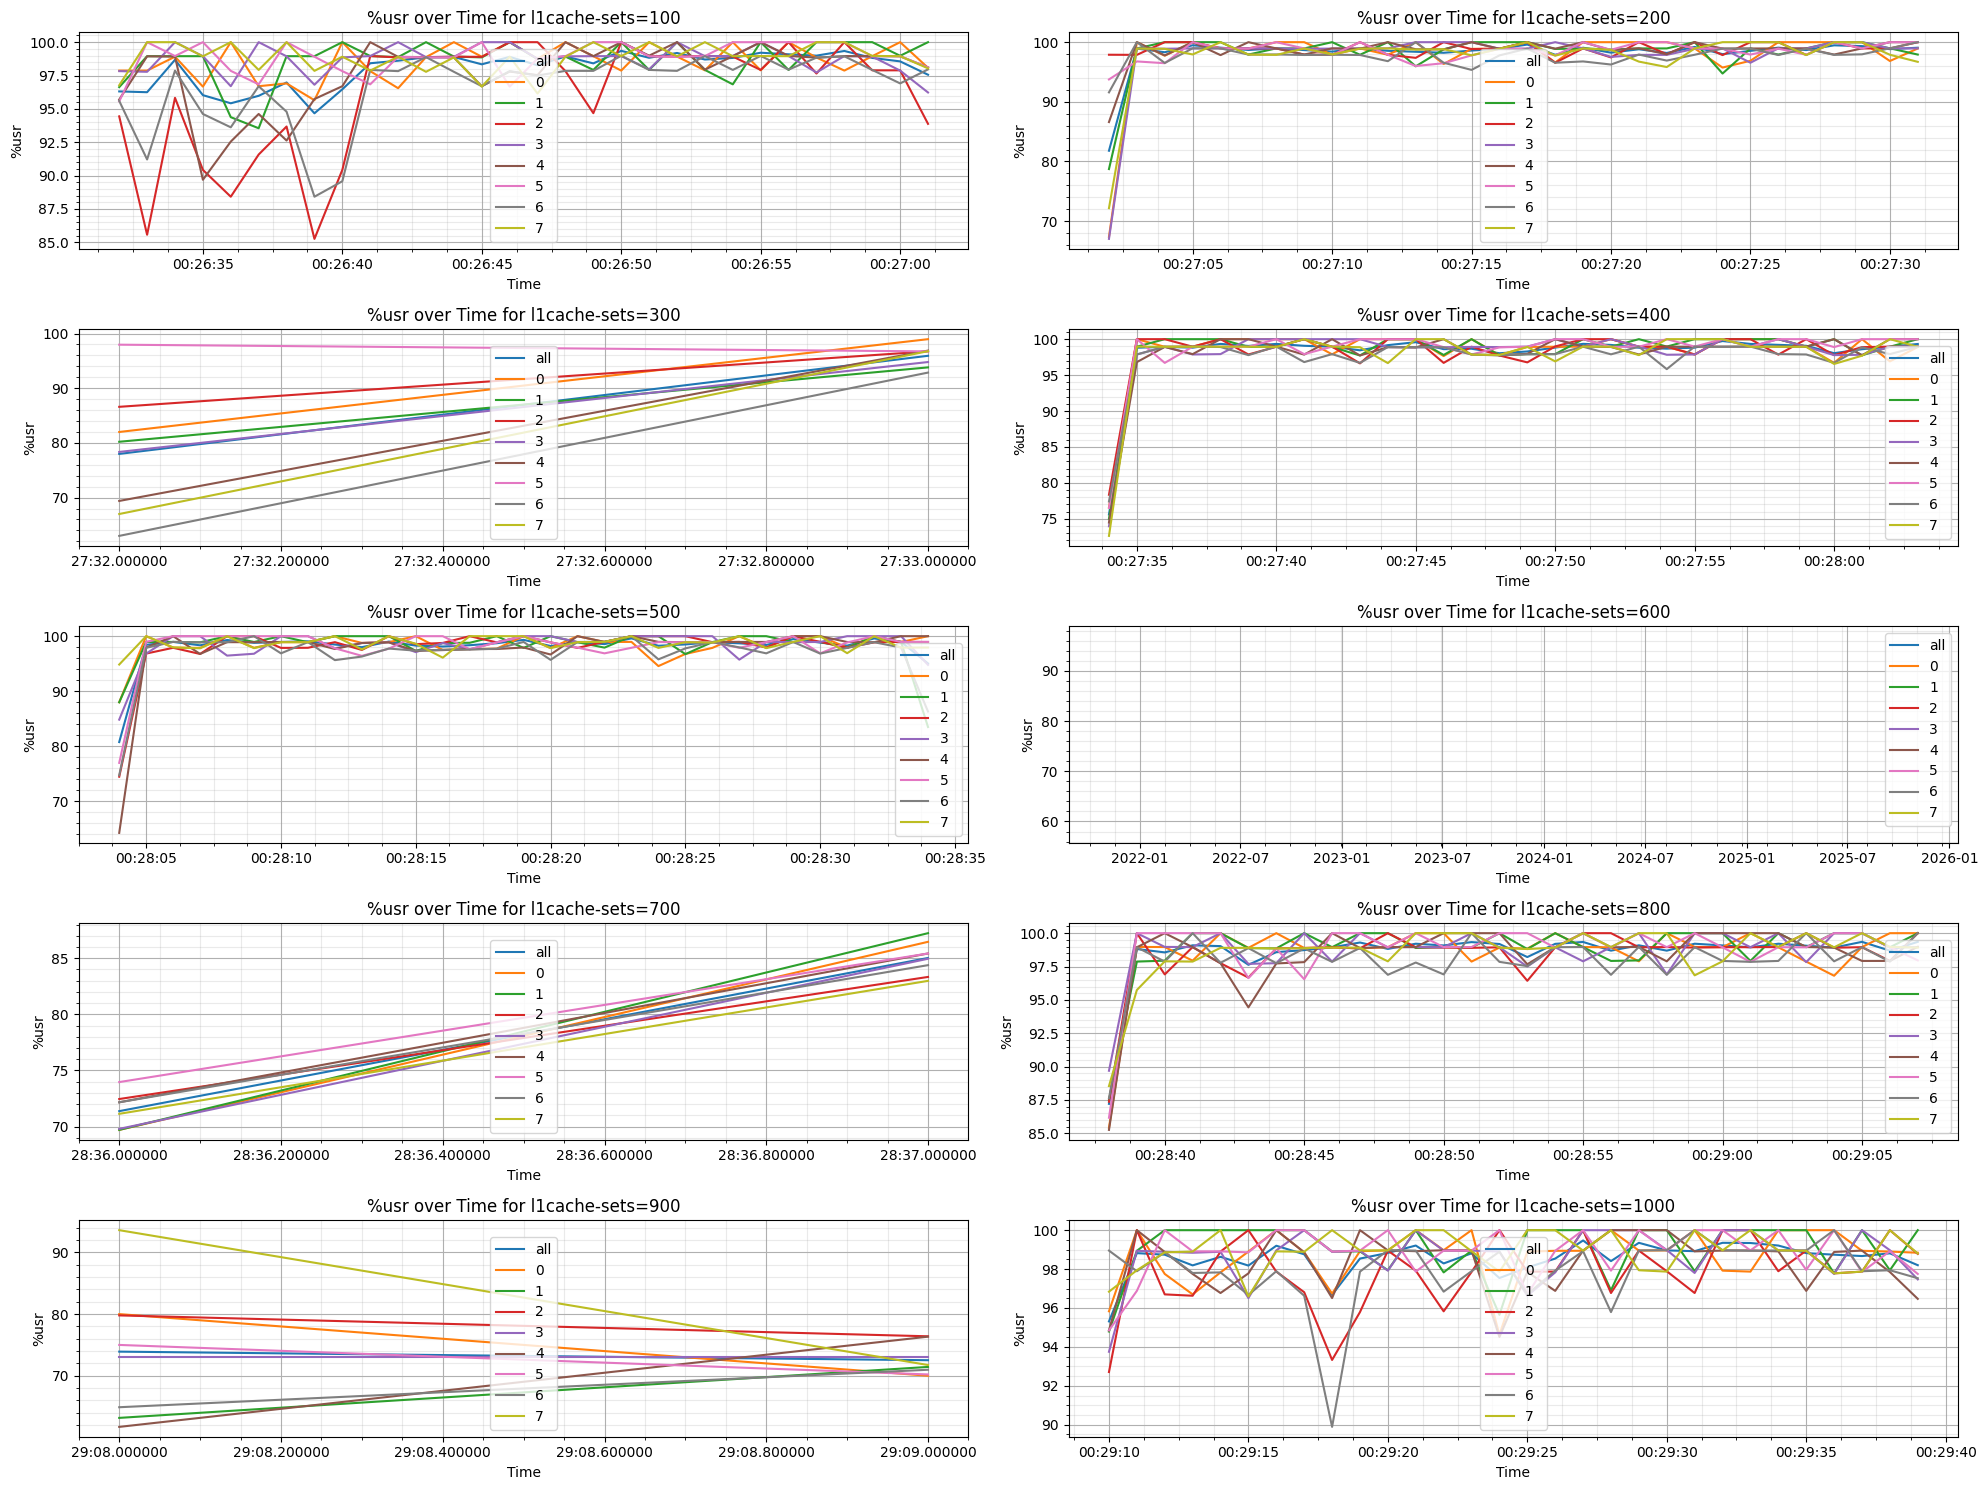

In [86]:
l1cache_values = df['l1cache-sets'].unique()
categories = df['CPU'].unique()

fig, axs = plt.subplots(5, 2, figsize=(20,15))  # Create a 4x4 grid of subplots

for i in range(5):
    for j in range(2):
        index = i*2 + j  # Calculate the index for l1cache_values
        if index < len(l1cache_values):  # Check if there is a l1cache value for this index
            value = l1cache_values[index]
            data = df[df['l1cache-sets'] == value]
            for category in categories:
                category_data = data[data['CPU'] == category]
                axs[i, j].plot(category_data['Time'], category_data['%usr'], label=category)
            axs[i, j].legend()
            axs[i, j].set_xlabel('Time')
            axs[i, j].set_ylabel('%usr')
            axs[i, j].grid(True)
            axs[i, j].minorticks_on()
            axs[i, j].grid(which='minor', linestyle='-', color='#999999', alpha=0.2)
            axs[i, j].set_title(f'%usr over Time for l1cache-sets={value}')

plt.tight_layout()  # To ensure subplots do not overlap
plt.savefig('./image/l1cache-sets-usr-cpu-2.png')
plt.show()

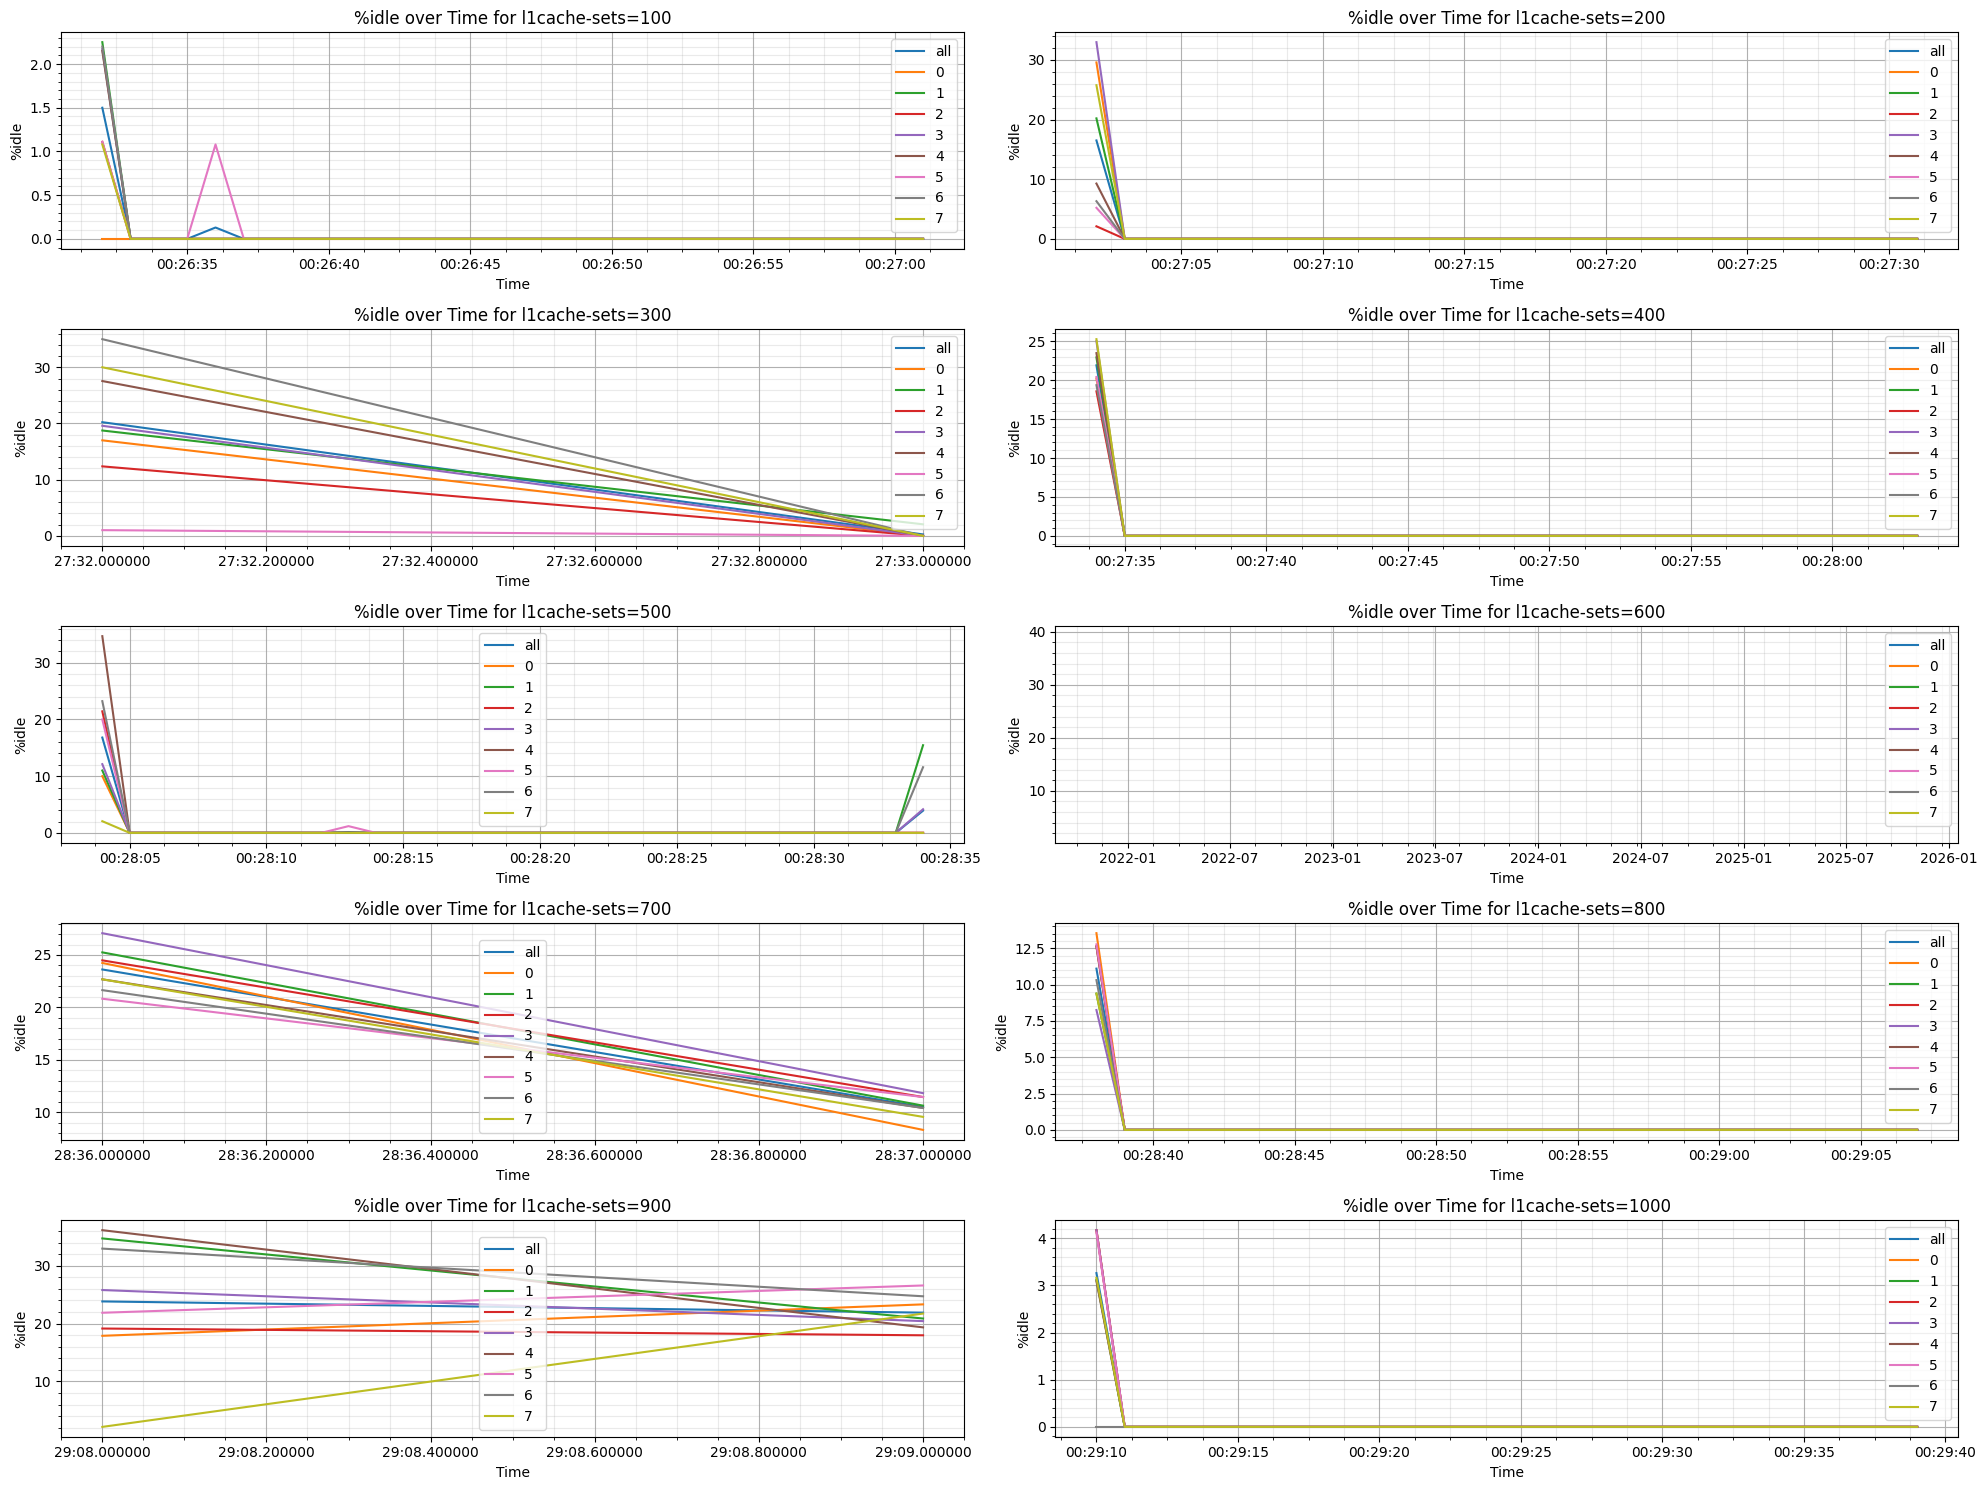

In [89]:
l1cache_values = df['l1cache-sets'].unique()
categories = df['CPU'].unique()

fig, axs = plt.subplots(5, 2, figsize=(20,15))  # Create a 4x4 grid of subplots

for i in range(5):
    for j in range(2):
        index = i*2 + j  # Calculate the index for l1cache_values
        if index < len(l1cache_values):  # Check if there is a l1cache value for this index
            value = l1cache_values[index]
            data = df[df['l1cache-sets'] == value]
            for category in categories:
                category_data = data[data['CPU'] == category]
                axs[i, j].plot(category_data['Time'], category_data['%idle'], label=category)
            axs[i, j].legend()
            axs[i, j].set_xlabel('Time')
            axs[i, j].set_ylabel('%idle')
            axs[i, j].grid(True)
            axs[i, j].minorticks_on()
            axs[i, j].grid(which='minor', linestyle='-', color='#999999', alpha=0.2)
            axs[i, j].set_title(f'%idle over Time for l1cache-sets={value}')

plt.tight_layout()  # To ensure subplots do not overlap
plt.savefig('./image/l1cache-sets-idle-cpu-2.png')
plt.show()

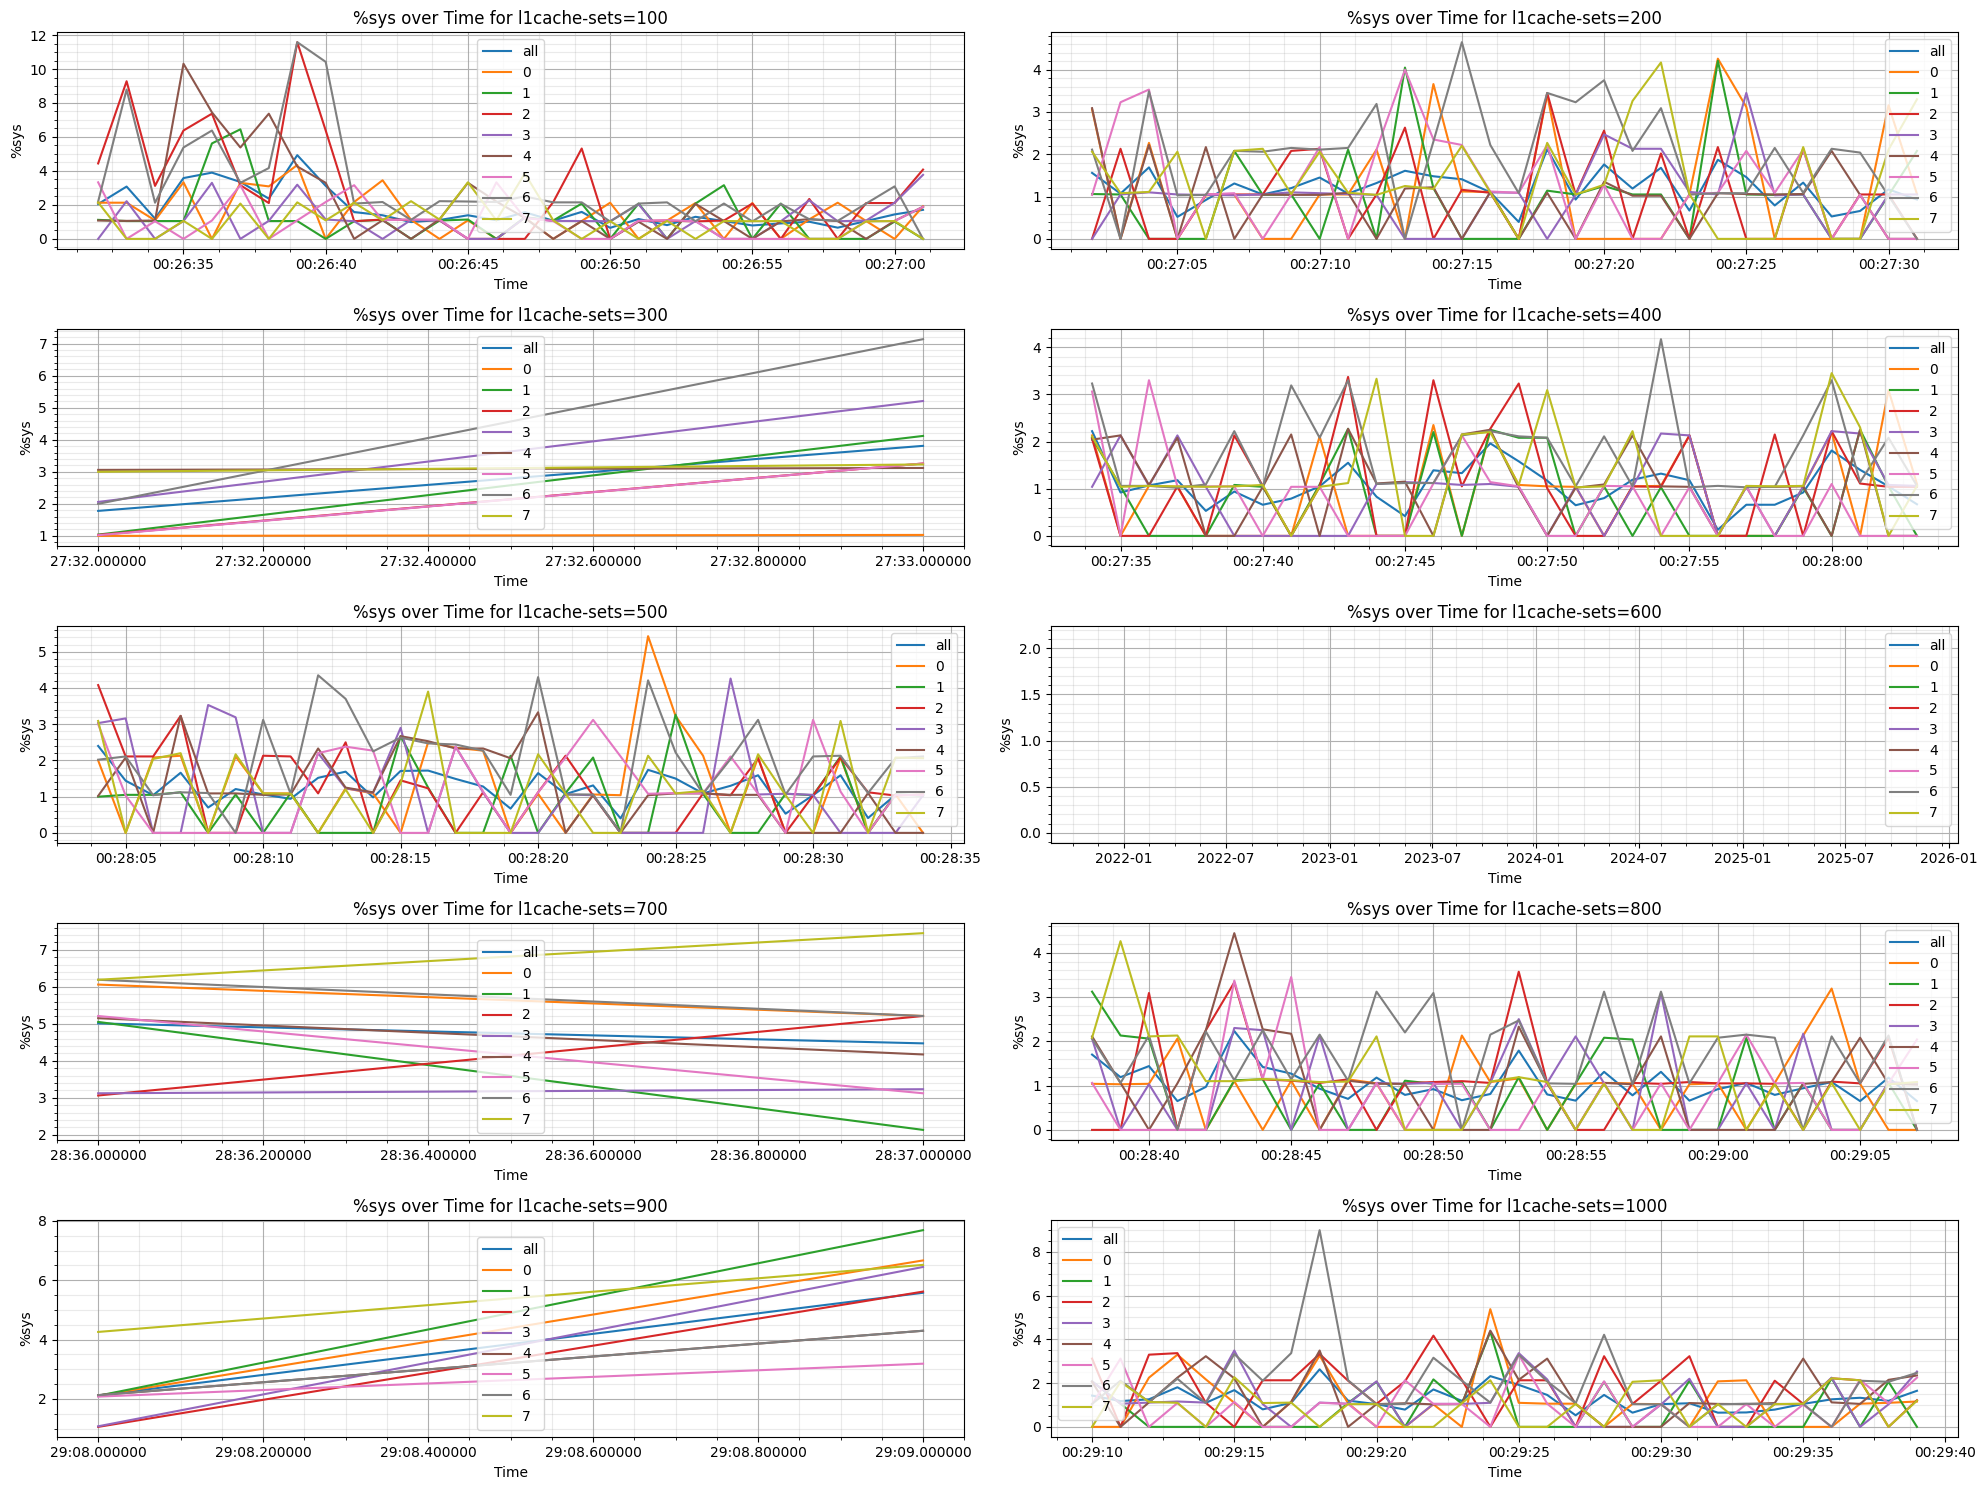

In [90]:
l1cache_values = df['l1cache-sets'].unique()
categories = df['CPU'].unique()

fig, axs = plt.subplots(5, 2, figsize=(20,15))  # Create a 4x4 grid of subplots

for i in range(5):
    for j in range(2):
        index = i*2 + j  # Calculate the index for l1cache_values
        if index < len(l1cache_values):  # Check if there is a l1cache value for this index
            value = l1cache_values[index]
            data = df[df['l1cache-sets'] == value]
            for category in categories:
                category_data = data[data['CPU'] == category]
                axs[i, j].plot(category_data['Time'], category_data['%sys'], label=category)
            axs[i, j].legend()
            axs[i, j].set_xlabel('Time')
            axs[i, j].set_ylabel('%sys')
            axs[i, j].grid(True)
            axs[i, j].minorticks_on()
            axs[i, j].grid(which='minor', linestyle='-', color='#999999', alpha=0.2)
            axs[i, j].set_title(f'%sys over Time for l1cache-sets={value}')

plt.tight_layout()  # To ensure subplots do not overlap
plt.savefig('./image/l1cache-sets-sys-cpu-2.png')
plt.show()

In [92]:
df = pd.read_csv('./csv/l1cache-fence.csv', sep=';')
df.head()

Time  CPU   %usr  %nice  %sys  %iowait  %irq  %soft  %steal  %guest  \
0  00:57:35  all  96.80    0.0  1.73      0.0   0.0    0.0     0.0     0.0   
1  00:57:35    0  95.70    0.0  2.15      0.0   0.0    0.0     0.0     0.0   
2  00:57:35    1  97.89    0.0  1.05      0.0   0.0    0.0     0.0     0.0   
3  00:57:35    2  97.89    0.0  1.05      0.0   0.0    0.0     0.0     0.0   
4  00:57:35    3  97.87    0.0  1.06      0.0   0.0    0.0     0.0     0.0   

   %gnice  %idle  
0     0.0   1.47  
1     0.0   2.15  
2     0.0   1.05  
3     0.0   1.05  
4     0.0   1.06

In [93]:
df['Time'] = pd.to_datetime(df['Time'])
df.head()

Time  CPU   %usr  %nice  %sys  %iowait  %irq  %soft  %steal  \
0 2023-11-06 00:57:35  all  96.80    0.0  1.73      0.0   0.0    0.0     0.0   
1 2023-11-06 00:57:35    0  95.70    0.0  2.15      0.0   0.0    0.0     0.0   
2 2023-11-06 00:57:35    1  97.89    0.0  1.05      0.0   0.0    0.0     0.0   
3 2023-11-06 00:57:35    2  97.89    0.0  1.05      0.0   0.0    0.0     0.0   
4 2023-11-06 00:57:35    3  97.87    0.0  1.06      0.0   0.0    0.0     0.0   

   %guest  %gnice  %idle  
0     0.0     0.0   1.47  
1     0.0     0.0   2.15  
2     0.0     0.0   1.05  
3     0.0     0.0   1.05  
4     0.0     0.0   1.06

In [94]:
df.describe()

%usr  %nice        %sys  %iowait   %irq       %soft  %steal  \
count  270.000000  270.0  270.000000    270.0  270.0  270.000000   270.0   
mean    98.864148    0.0    1.069556      0.0    0.0    0.013111     0.0   
std      0.998373    0.0    0.889220      0.0    0.0    0.110692     0.0   
min     93.750000    0.0    0.000000      0.0    0.0    0.000000     0.0   
25%     98.065000    0.0    0.000000      0.0    0.0    0.000000     0.0   
50%     98.950000    0.0    1.050000      0.0    0.0    0.000000     0.0   
75%    100.000000    0.0    1.445000      0.0    0.0    0.000000     0.0   
max    100.000000    0.0    4.550000      0.0    0.0    1.080000     0.0   

       %guest  %gnice       %idle  
count   270.0   270.0  270.000000  
mean      0.0     0.0    0.053111  
std       0.0     0.0    0.297116  
min       0.0     0.0    0.000000  
25%       0.0     0.0    0.000000  
50%       0.0     0.0    0.000000  
75%       0.0     0.0    0.000000  
max       0.0     0.0    3.120000

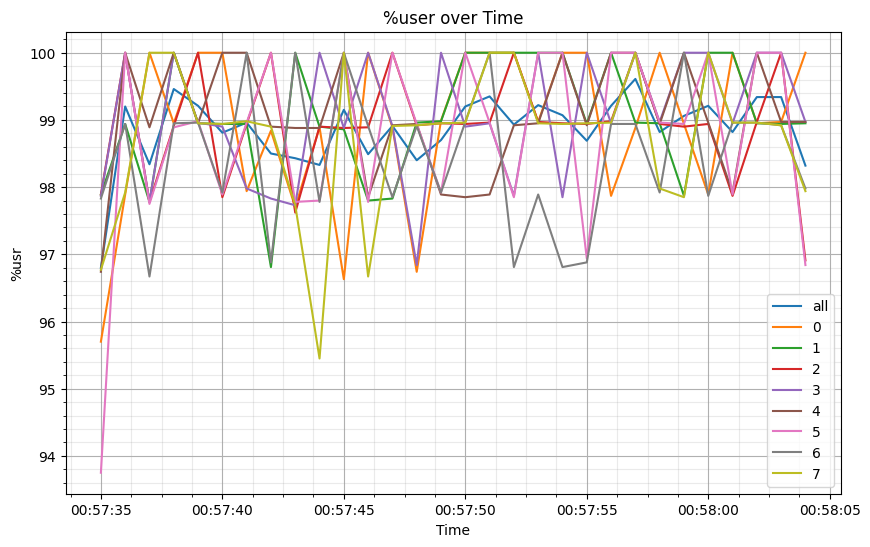

In [95]:
categories = df['CPU'].unique()
plt.figure(figsize=(10,6))
for category in categories:
    category_data = df[df['CPU'] == category]
    plt.plot(category_data['Time'], category_data['%usr'], label=category)
plt.legend()
plt.xlabel('Time')
plt.ylabel('%usr')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', color='#999999', alpha=0.2)
plt.title('%user over Time')
plt.savefig('./image/l1cache-fence-usr.png')
plt.show()

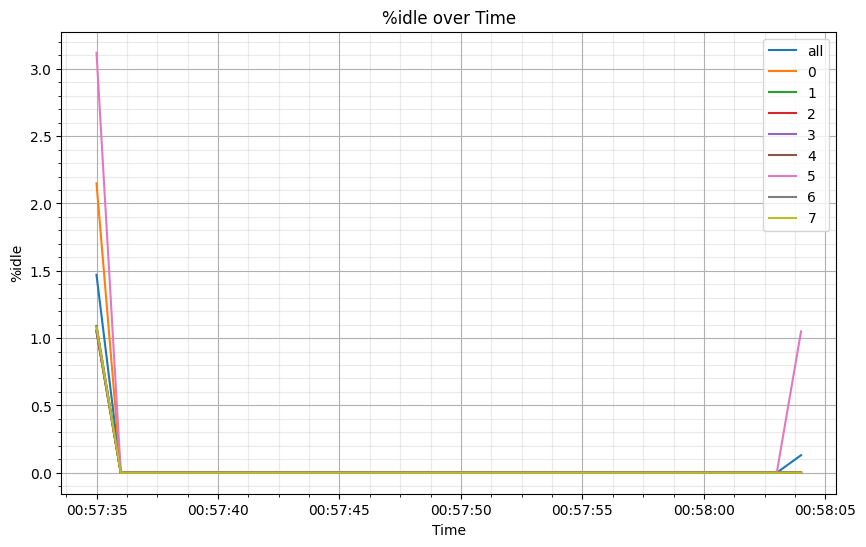

In [96]:
categories = df['CPU'].unique()
plt.figure(figsize=(10,6))
for category in categories:
    category_data = df[df['CPU'] == category]
    plt.plot(category_data['Time'], category_data['%idle'], label=category)
plt.legend()
plt.xlabel('Time')
plt.ylabel('%idle')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', color='#999999', alpha=0.2)
plt.title('%idle over Time')
plt.savefig('./image/l1cache-fence-idle.png')
plt.show()

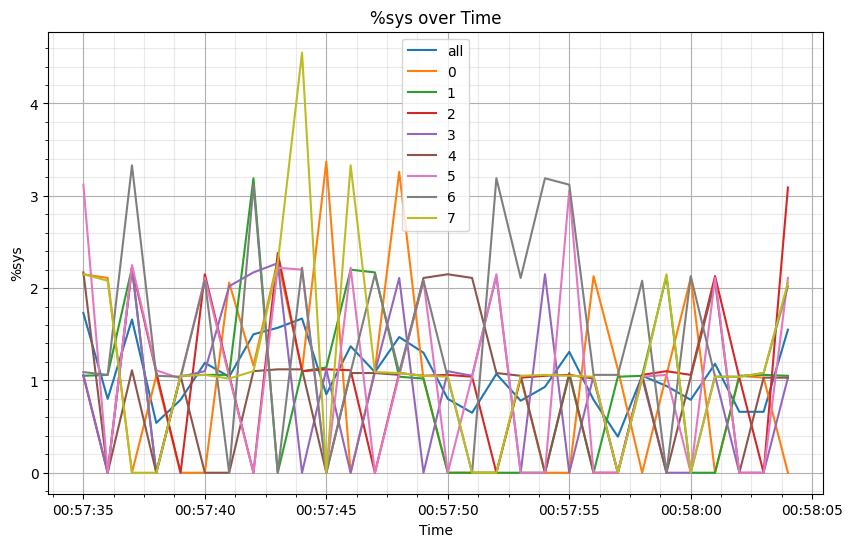

In [97]:
categories = df['CPU'].unique()
plt.figure(figsize=(10,6))
for category in categories:
    category_data = df[df['CPU'] == category]
    plt.plot(category_data['Time'], category_data['%sys'], label=category)
plt.legend()
plt.xlabel('Time')
plt.ylabel('%sys')
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='-', color='#999999', alpha=0.2)
plt.title('%sys over Time')
plt.savefig('./image/l1cache-fence-sys.png')
plt.show()